In [1]:
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from paper.systems.simplesystem import simplesystem
from ctse.systems.ct_system import ct_system
import pandas as pd
import matplotlib.pyplot as plt

system = ct_system()
rawdata = system.rawdata
data = system.data

2022-11-15 11:50:59 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2022-11-15 11:50:59 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)


In [3]:
def snr(s: pd.Series):
    return abs((s[-1] - s[0])) / s.diff().abs().sum()

term = 50
inss = [ins for ins in system.get_instrument_list()]
snrs = [data.daily_prices(ins).dropna().rolling(term, min_periods=term).apply(snr).rename(ins) for ins in inss]
df = pd.concat(snrs, axis=1)
mdi = df.mean(axis=1).rename('mdi')

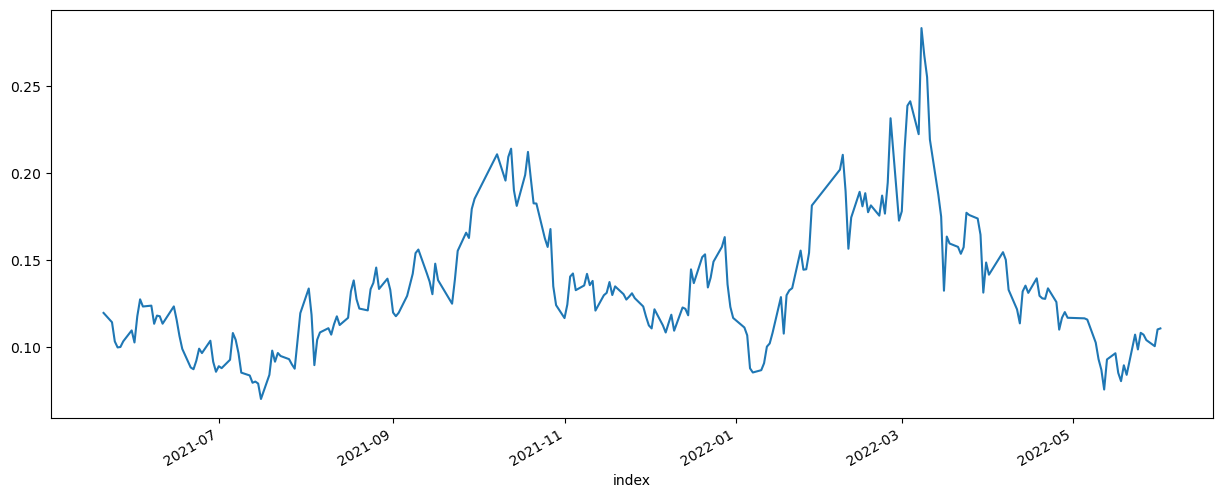

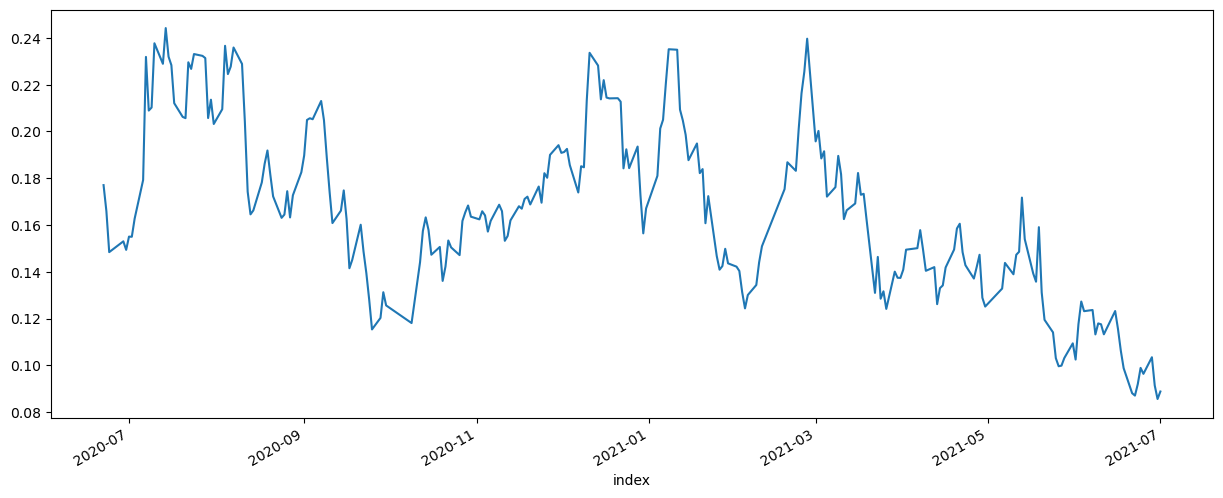

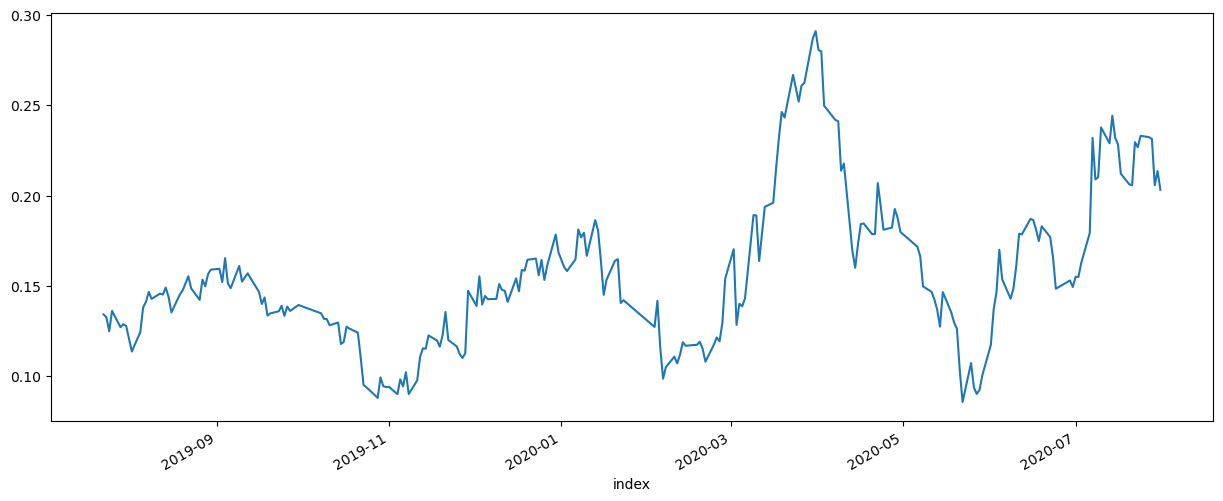

In [5]:
for date in ['2022-06-01', '2021-07-01', '2020-08-01']:
    mdi.loc[:date].tail(250).plot(figsize=(15,6))
    plt.show()

In [52]:
rolling_return  = system.accounts.portfolio().gross.rolling(100).sum().rename('rolling_return')
rolling_return.corr(mdi)

/Users/weiranzhou/Code/pysystemtrade/systems/accounts/pandl_calculators/pandl_calculation_dict.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(price=pd.Series(), capital=capital)


0.7203780239116504

0.5189444973348544

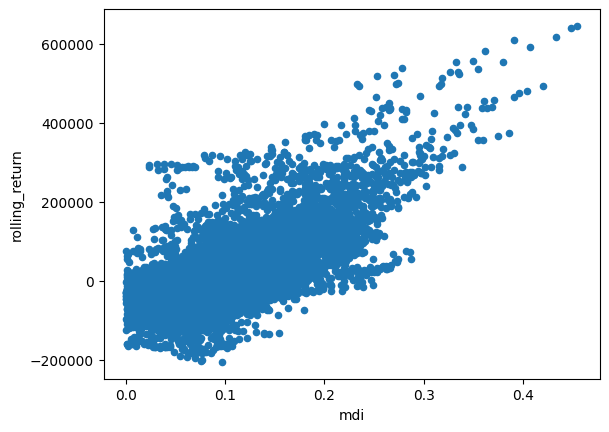

In [60]:
from  sklearn.linear_model import LinearRegression

df = pd.concat([mdi, rolling_return], axis=1).dropna()
df.plot.scatter(x='mdi', y='rolling_return')

model = LinearRegression()
estimator = model.fit(pd.DataFrame(df['mdi']), pd.DataFrame(df['rolling_return']))
estimator.score(pd.DataFrame(df['mdi']), pd.DataFrame(df['rolling_return']))

<BarContainer object of 10 artists>

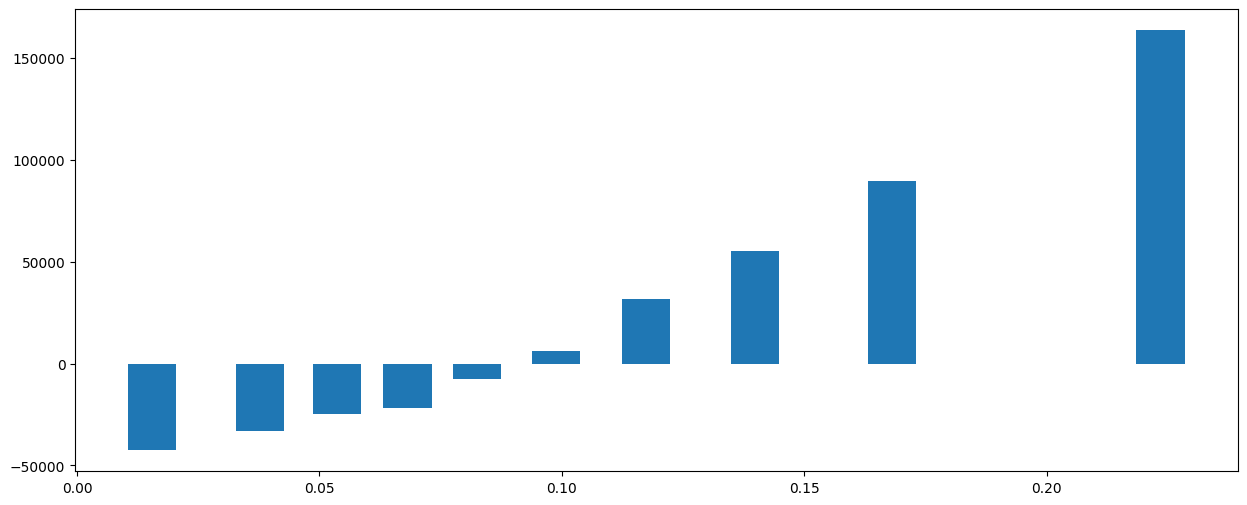

In [93]:
import numpy as np

xs = []
ys = []
for bin in np.array_split(df.sort_values('mdi'), 10):
    xs.append(bin['mdi'].mean())
    ys.append(bin['rolling_return'].mean())
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(xs, ys, width=0.01)